In [1]:
%%time
import malaya

CPU times: user 4.83 s, sys: 1.16 s, total: 5.99 s
Wall time: 6.98 s


In [2]:
string1 = 'Sis, students from overseas were brought back because they are not in their countries which is if something happens to them, its not the other countries’ responsibility. Student dalam malaysia ni dah dlm tggjawab kerajaan. Mana part yg tak faham?'
string2 = 'Harap kerajaan tak bukak serentak. Slowly release week by week. Focus on economy related industries dulu'

## Load multinomial model

All model interface will follow sklearn interface started v3.4,

```python
model.predict(List[str])

model.predict_proba(List[str])
```

In [3]:
model = malaya.sentiment.multinomial()

In [4]:
model.predict([string1, string2])

['positive', 'negative']

In [5]:
model.predict_proba([string1, string2])

[{'negative': 0.008184343650433397,
  'positive': 0.18156563495665812,
  'neutral': 0.8102500213929085},
 {'negative': 0.010056240383248257,
  'positive': 0.009943759616751778,
  'neutral': 0.98}]

Disable `neutral` probability,

In [7]:
model.predict_proba([string1, string2], add_neutral = False)

[{'negative': 0.40921718252166983, 'positive': 0.5907828174783291},
 {'negative': 0.5028120191624128, 'positive': 0.49718798083758886}]

## List available Transformer models

In [8]:
malaya.sentiment.available_transformer_model()

{'bert': ['425.6 MB', 'accuracy: 0.993'],
 'tiny-bert': ['57.4 MB', 'accuracy: 0.987'],
 'albert': ['48.6 MB', 'accuracy: 0.992'],
 'tiny-albert': ['22.4 MB', 'accuracy: 0.985'],
 'xlnet': ['446.5 MB', 'accuracy: 0.993'],
 'alxlnet': ['46.8 MB', 'accuracy: 0.991']}

Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/Accuracy.html#sentiment-analysis

**You might want to use Tiny-Albert, a very small size, 22.4MB, but the accuracy is still on the top notch.**

## Load XLNET model

All model interface will follow sklearn interface started v3.4,

```python
model.predict(List[str])

model.predict_proba(List[str])
```

In [4]:
model = malaya.sentiment.transformer(model = 'xlnet')

#### Predict batch of strings

In [12]:
model.predict_proba([string1, string2])

[{'negative': 0.00018888633, 'positive': 0.9811114, 'neutral': 0.018699706},
 {'negative': 0.8079505, 'positive': 0.0019204962, 'neutral': 0.19012898}]

In [13]:
model.predict_proba([string1, string2], add_neutral = False)

[{'negative': 0.029847767, 'positive': 0.97015226},
 {'negative': 0.1034979, 'positive': 0.89650214}]

#### Open emotion visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [15]:
model.predict_words(string1)

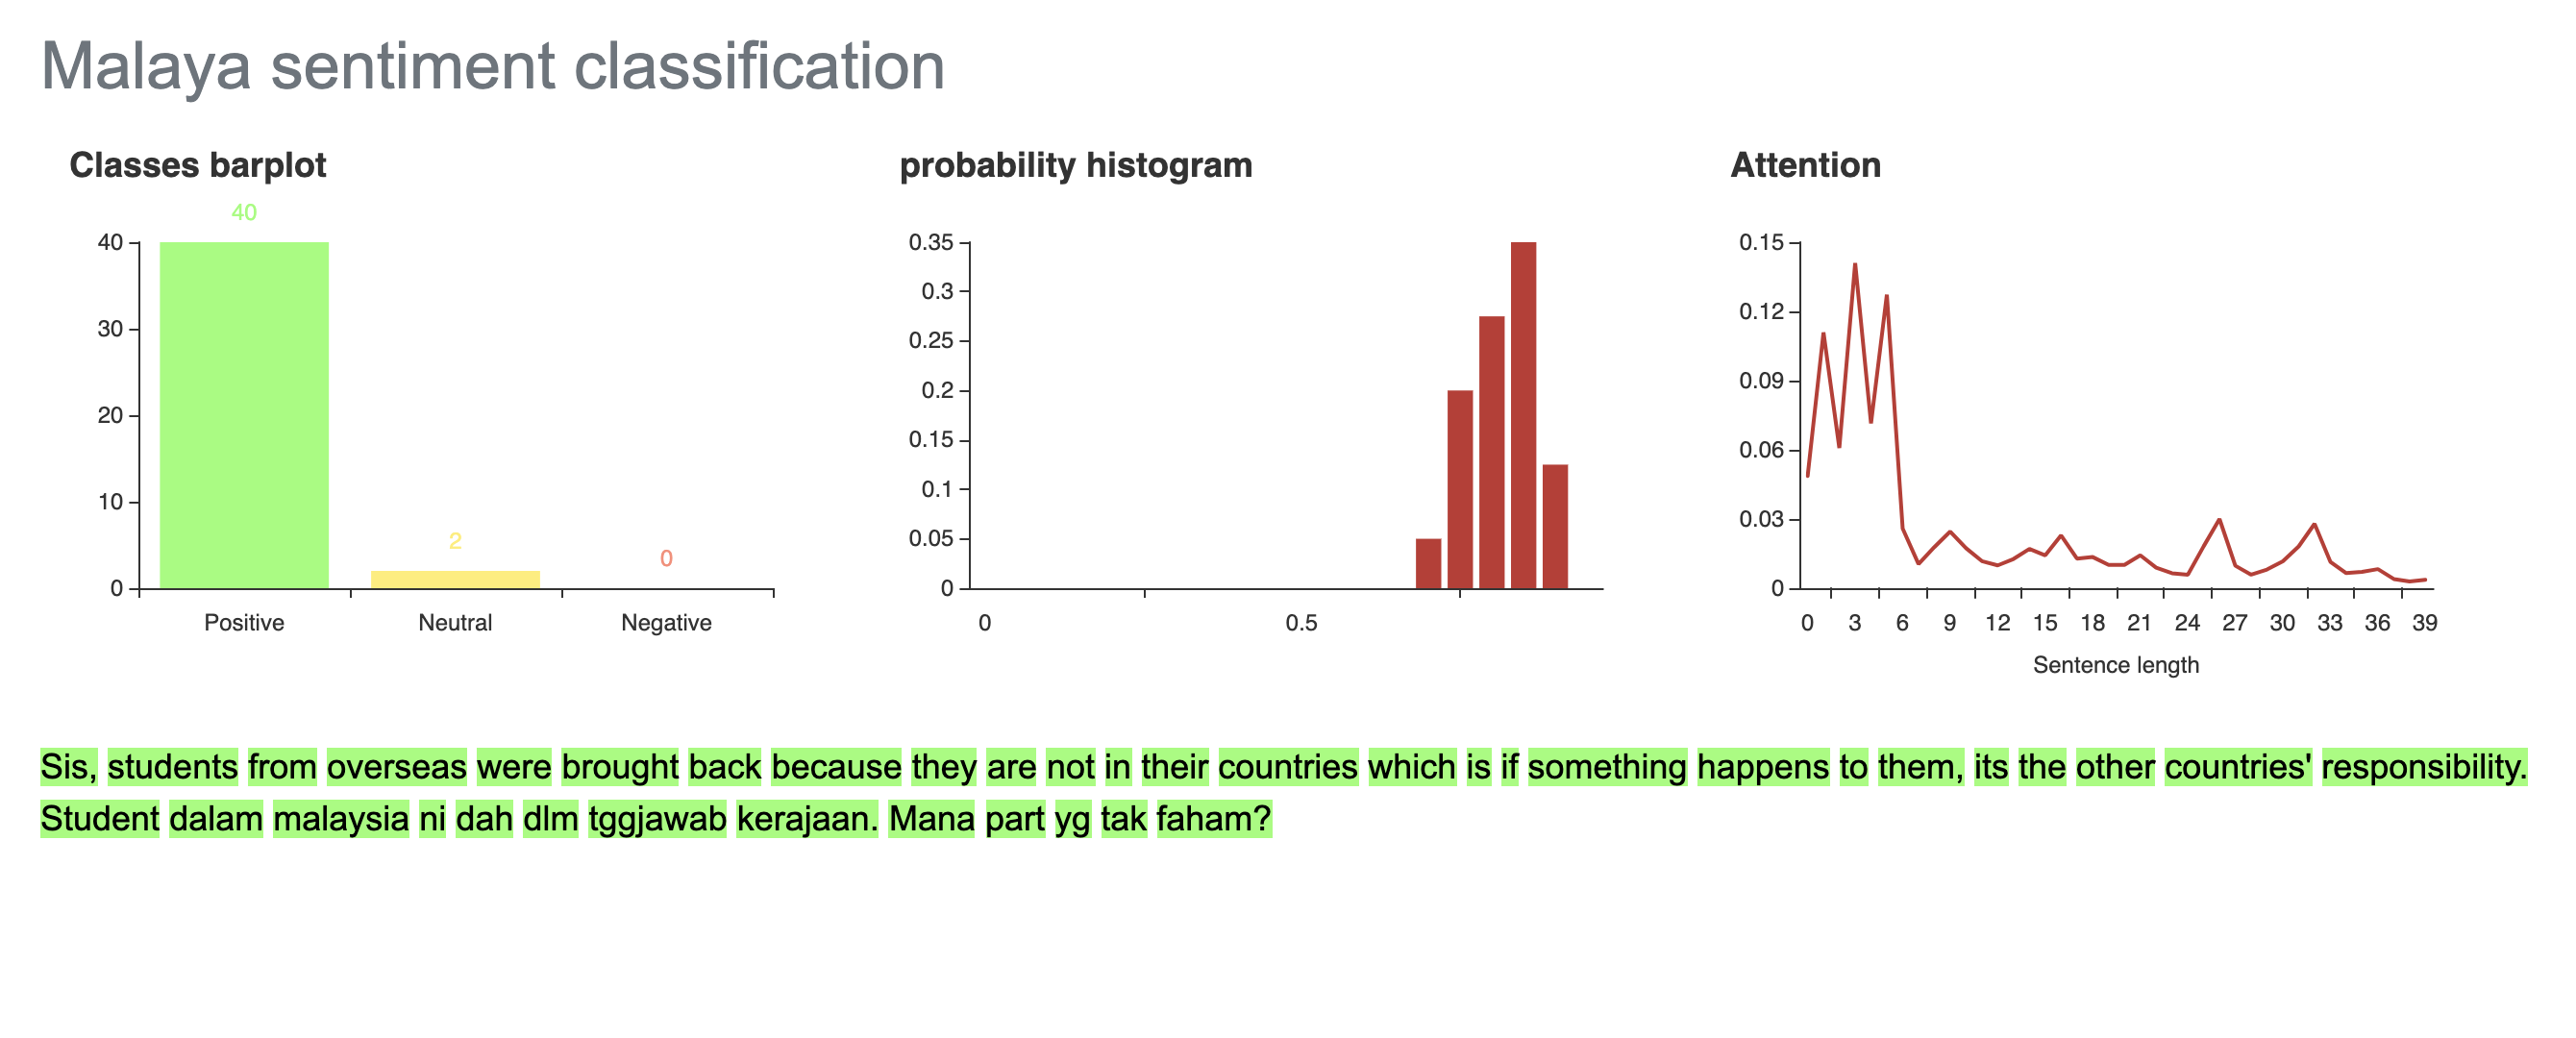

In [16]:
from IPython.core.display import Image, display

display(Image('sentiment-dashboard.png', width=800))

## Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [5]:
multinomial = malaya.sentiment.multinomial()
alxlnet = malaya.sentiment.transformer(model = 'alxlnet')

In [8]:
malaya.stack.predict_stack([multinomial, alxlnet, model], [string1, string2])

[{'negative': 0.0005453552136673502,
  'positive': 0.5603020846001405,
  'neutral': 0.05399025419995675},
 {'negative': 0.0002248290781177622,
  'positive': 0.21361579430243546,
  'neutral': 0.022142383292097452}]

If you do not want neutral in `predict_stack`, simply override the parameter,

In [9]:
malaya.stack.predict_stack([multinomial, alxlnet, model], [string1, string2], add_neutral = False)

[{'negative': 0.05828375571937787, 'positive': 0.8221586003437801},
 {'negative': 0.014352668987571138, 'positive': 0.7835866999009022}]